<a href="https://colab.research.google.com/github/pndang/Everything-PyTorch/blob/master/Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


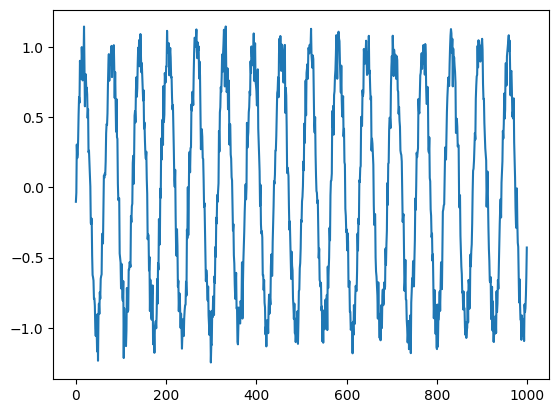

In [ ]:
# make sine data
N = 1000
series = np.sin(0.1*np.arange(N)) + np.random.randn(N)*0.1

# plot
plt.plot(series)
plt.show()

In [ ]:
# build dataset, use T past values to predict the next value

T = 10
X = []
Y = []
for t in range(len(series) - T):
  X.append(series[t:t+T])
  Y.append(series[t+T])

X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (990, 10) Y.shape (990, 1)


In [ ]:
X

array([[-0.10200095, -0.03778746,  0.30596848, ...,  0.64391734,
         0.6034572 ,  0.90268491],
       [-0.03778746,  0.30596848,  0.20913302, ...,  0.6034572 ,
         0.90268491,  0.82938938],
       [ 0.30596848,  0.20913302,  0.23556919, ...,  0.90268491,
         0.82938938,  0.87358216],
       ...,
       [-1.08605204, -0.91235837, -1.0542887 , ..., -0.83327288,
        -0.88887639, -0.86011761],
       [-0.91235837, -1.0542887 , -0.97250343, ..., -0.88887639,
        -0.86011761, -0.77128818],
       [-1.0542887 , -0.97250343, -0.93662487, ..., -0.86011761,
        -0.77128818, -0.62895337]])

In [ ]:
Y[:10]

array([[0.82938938],
       [0.87358216],
       [0.77429295],
       [1.0004181 ],
       [0.90412761],
       [0.76314308],
       [0.96524364],
       [0.90864388],
       [1.1470475 ],
       [0.8654375 ]])

In [ ]:
# instantiate autoregressive model
model = nn.Linear(T, 1)

In [ ]:
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [ ]:
# make inputs and targets
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))

In [ ]:
# sanity check
Y[:10]

array([[0.82938938],
       [0.87358216],
       [0.77429295],
       [1.0004181 ],
       [0.90412761],
       [0.76314308],
       [0.96524364],
       [0.90864388],
       [1.1470475 ],
       [0.8654375 ]])

In [ ]:
Y[:-N//2][:10]

array([[0.82938938],
       [0.87358216],
       [0.77429295],
       [1.0004181 ],
       [0.90412761],
       [0.76314308],
       [0.96524364],
       [0.90864388],
       [1.1470475 ],
       [0.8654375 ]])

In [ ]:
# training

def full_gd(model,
            criterion,
            optimizer,
            X_train,
            y_train,
            X_test,
            y_test,
            epochs=200):

  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for ite in range(epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # backward and optimize
    loss.backward()
    optimizer.step()

    # save losses
    train_losses[ite] = loss.item()

    # test loss
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[ite] = test_loss.item()

    if (ite + 1) % 5 == 0:
      print(f'Epoch {ite+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

  return train_losses, test_losses

In [ ]:
train_losses, test_losses = full_gd(model,
                                    criterion,
                                    optimizer,
                                    X_train,
                                    y_train,
                                    X_test,
                                    y_test)

Epoch 5/200, Train Loss: 0.2231, Test Loss: 0.0760
Epoch 10/200, Train Loss: 0.1341, Test Loss: 0.0668
Epoch 15/200, Train Loss: 0.0889, Test Loss: 0.0777
Epoch 20/200, Train Loss: 0.0480, Test Loss: 0.0601
Epoch 25/200, Train Loss: 0.0253, Test Loss: 0.0336
Epoch 30/200, Train Loss: 0.0191, Test Loss: 0.0188
Epoch 35/200, Train Loss: 0.0203, Test Loss: 0.0164
Epoch 40/200, Train Loss: 0.0216, Test Loss: 0.0175
Epoch 45/200, Train Loss: 0.0208, Test Loss: 0.0174
Epoch 50/200, Train Loss: 0.0192, Test Loss: 0.0166
Epoch 55/200, Train Loss: 0.0182, Test Loss: 0.0163
Epoch 60/200, Train Loss: 0.0177, Test Loss: 0.0161
Epoch 65/200, Train Loss: 0.0172, Test Loss: 0.0158
Epoch 70/200, Train Loss: 0.0168, Test Loss: 0.0156
Epoch 75/200, Train Loss: 0.0166, Test Loss: 0.0155
Epoch 80/200, Train Loss: 0.0165, Test Loss: 0.0154
Epoch 85/200, Train Loss: 0.0163, Test Loss: 0.0153
Epoch 90/200, Train Loss: 0.0162, Test Loss: 0.0153
Epoch 95/200, Train Loss: 0.0162, Test Loss: 0.0152
Epoch 100/200

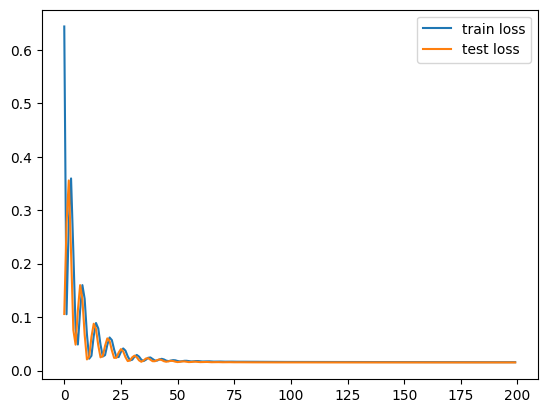

In [ ]:
# plot losses per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [ ]:
# "wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_preds = []

# index of first validation input
i = 0

while len(validation_preds) < len(validation_target):
  input_ = X_test[i].view(1, -1)
  p = model(input_)[0,0].item() # 1x1 array -> scalar
  i += 1

  validation_preds.append(p)

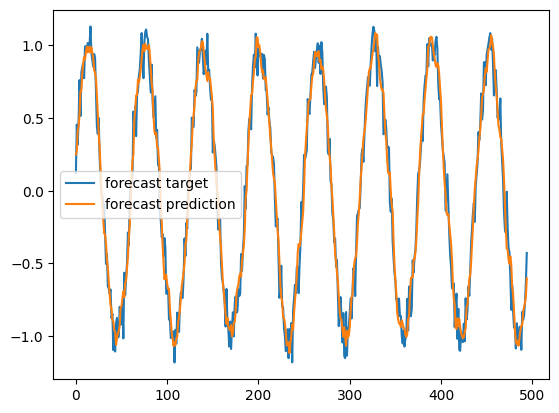

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_preds, label='forecast prediction')
plt.legend()

In [ ]:
# forecast future values (use only self-predictions for making future preds)

validation_target = Y[-N//2:]
validation_preds = []

# last train input
# 1-D array of length T
last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while len(validation_preds) < len(validation_target):
  input_ = last_x.view(1, -1)
  p = model(input_)
  # [0,0] # 1x1 array -> scalar

  validation_preds.append(p[0,0].item())

  # new input
  last_x = torch.cat((last_x[1:], p[0]))

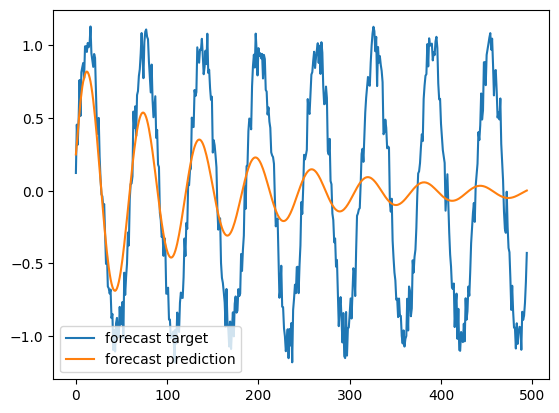

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_preds, label='forecast prediction')
plt.legend()